In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully")

All libraries imported successfully


Load Dataset

In [3]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path("../data/processed/final.csv")
if not DATA_PATH.exists():
    raise FileNotFoundError(f"File not found: {DATA_PATH.resolve()}")

# Load CSV
df = pd.read_csv(DATA_PATH)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (30000, 12)


Dataset Overview

In [4]:
# Display first few rows
print("First 5 rows:")
df.head()


First 5 rows:


,ID,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,target
0,8.381021e+08,NautiCloud,Technology,Technology,USD,2012-03-06,34500.0,2012-01-06 20:48:16,failed,US,34500.00,0.0
1,5.175163e+08,FM Radio & 2015 Tour,R&B,Music,USD,2015-02-28,2500.0,2015-01-24 02:00:15,failed,US,2500.00,0.0
2,1.409505e+09,Old Virginia Smoke Competition Barbecue and Ca...,Food,Food,USD,2014-02-13,5000.0,2013-12-16 15:12:04,successful,US,5000.00,1.0
3,1.078364e+09,The Sock Lab: Ultimate Everyday Socks,Fashion,Fashion,GBP,2017-10-19,4000.0,2017-09-04 08:46:05,successful,GB,5274.54,1.0
4,2.086350e+09,Revealing the real Rhett Butler,Documentary,Film & Video,USD,2011-06-28,20000.0,2011-05-29 21:28:51,failed,US,20000.00,0.0


In [16]:
# Dataset information
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   name           30000 non-null  object 
 2   category       30000 non-null  object 
 3   main_category  30000 non-null  object 
 4   currency       30000 non-null  object 
 5   deadline       30000 non-null  object 
 6   goal           30000 non-null  float64
 7   launched       30000 non-null  object 
 8   state          30000 non-null  object 
 9   country        30000 non-null  object 
 10  usd_goal_real  30000 non-null  float64
 11  target         30000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ MB


In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe()


Statistical Summary:


,ID,goal,usd_goal_real,target
count,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,1.069728e+09,10553.035821,10443.568686,0.403867
std,6.167369e+08,11419.521179,11314.900508,0.490680
min,2.137100e+04,1.000000,0.780000,0.000000
25%,5.331998e+08,2000.000000,2000.000000,0.000000
50%,1.065408e+09,5000.000000,5000.000000,0.000000
75%,1.606697e+09,15000.000000,15000.000000,1.000000
max,2.147460e+09,34500.000000,34500.000000,1.000000



1. Missing Values Analysis


In [6]:
#Check Missing Value
missing_values=df.isnull().sum()
print("Missing values column wise are:-",missing_values)

total_missing=missing_values.sum()
print("Total missing values are:-",total_missing)

Missing values column wise are:- ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
usd_goal_real    0
target           0
dtype: int64
Total missing values are:- 0


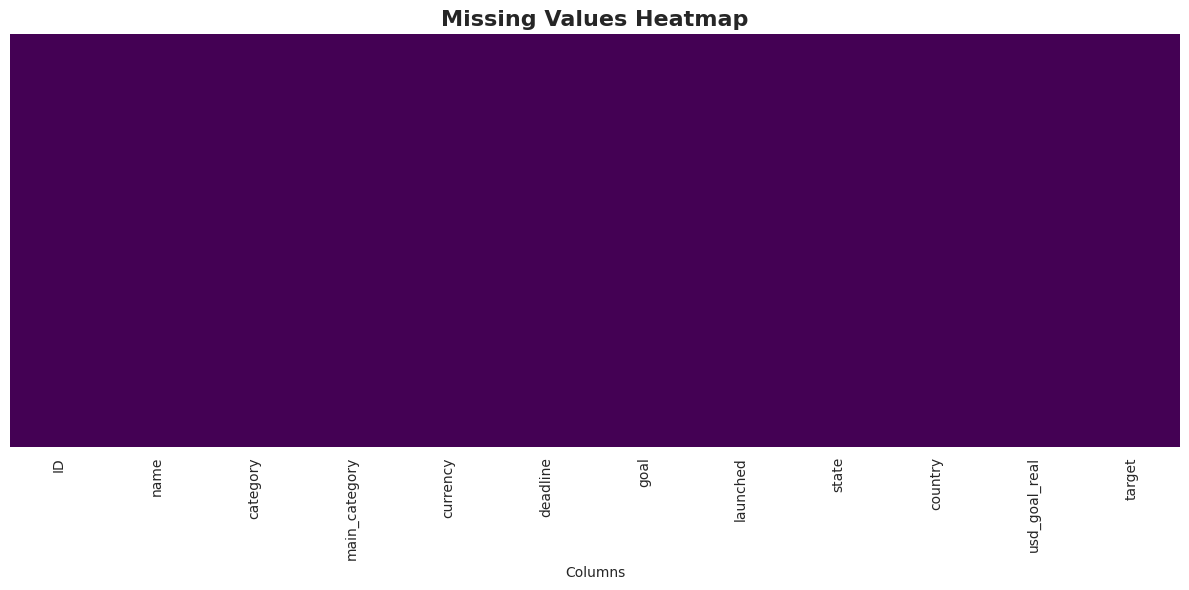


Observation:
✅ No missing values are present in the cleaned dataset.


In [7]:
# Missing Values Heatmap

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

print("\nObservation:")
if total_missing == 0:
    print("✅ No missing values are present in the cleaned dataset.")
else:
    print(f"⚠️ Found {total_missing} missing values that need attention.")


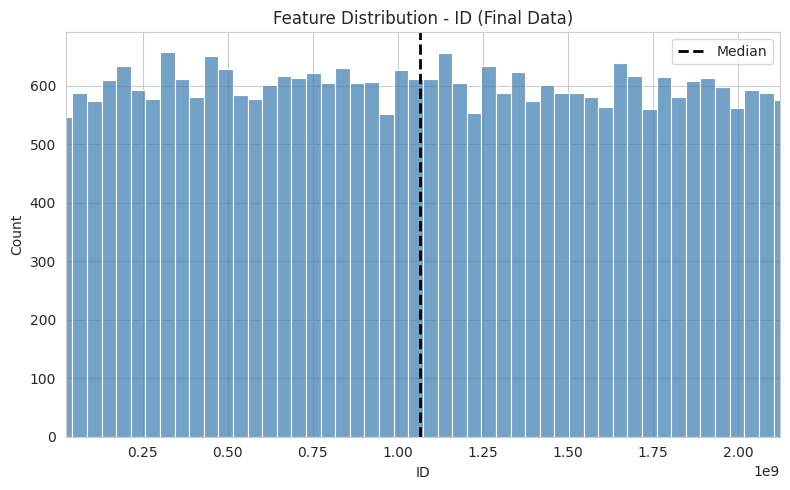

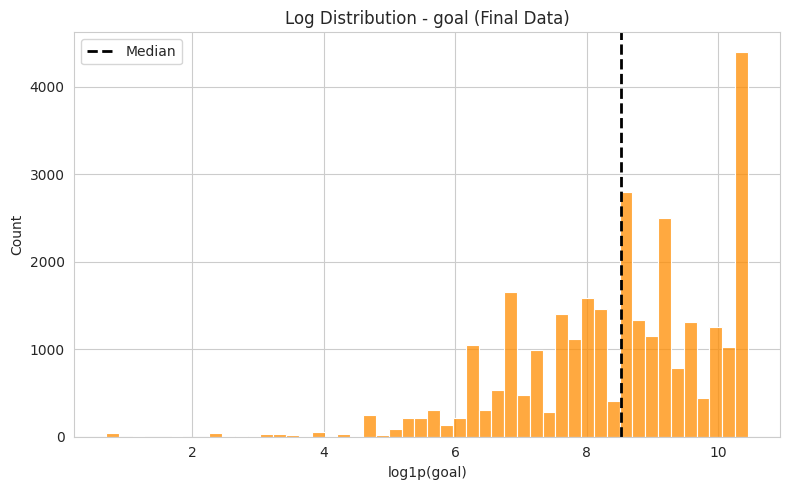

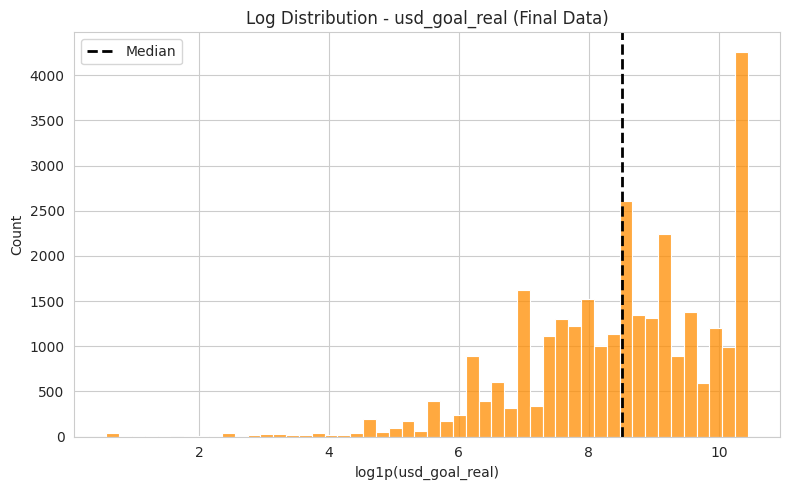

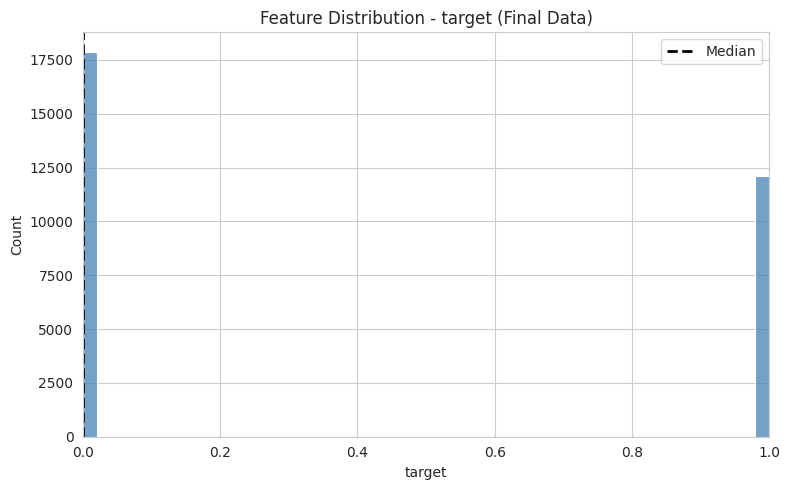

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    
    skewness = df[col].skew()

    plt.figure(figsize=(8,5))

    if skewness > 1:
        values = np.log1p(df[col])
        sns.histplot(values, bins=50, kde=False, color="darkorange")
        plt.title(f"Log Distribution - {col} (Final Data)")
        plt.xlabel(f"log1p({col})")
        median_value = np.median(values)
    else:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)

        sns.histplot(df[col], bins=50, kde=False, color="steelblue")
        plt.xlim(lower, upper)
        plt.title(f"Feature Distribution - {col} (Final Data)")
        plt.xlabel(col)
        median_value = df[col].median()

    plt.axvline(median_value, color="black", linestyle="--", linewidth=2, label="Median")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


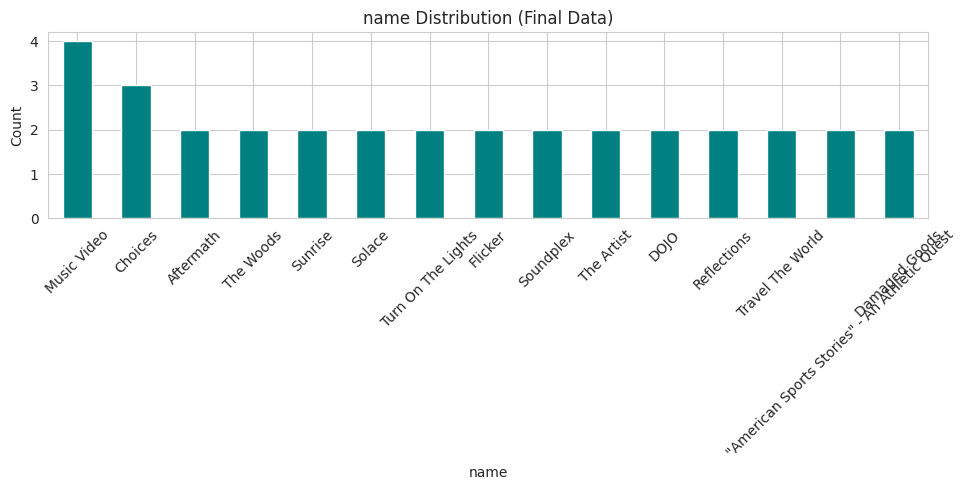

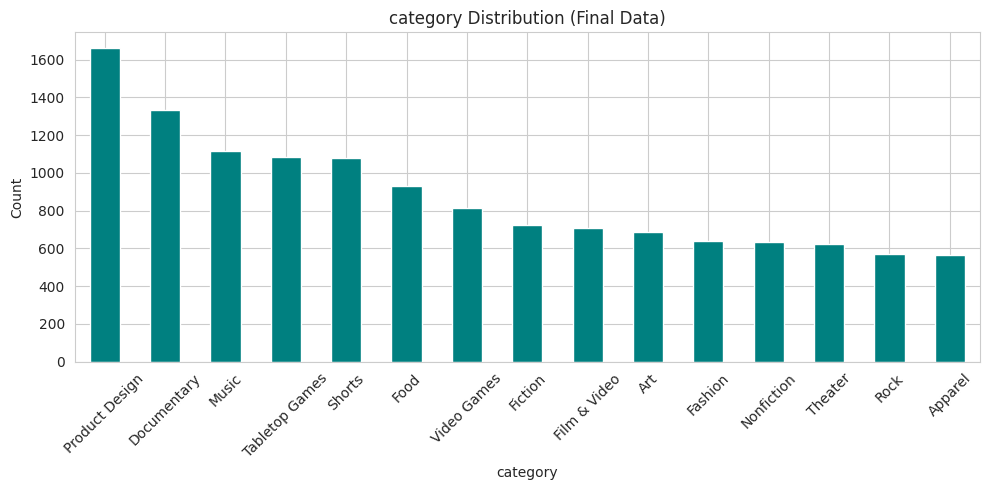

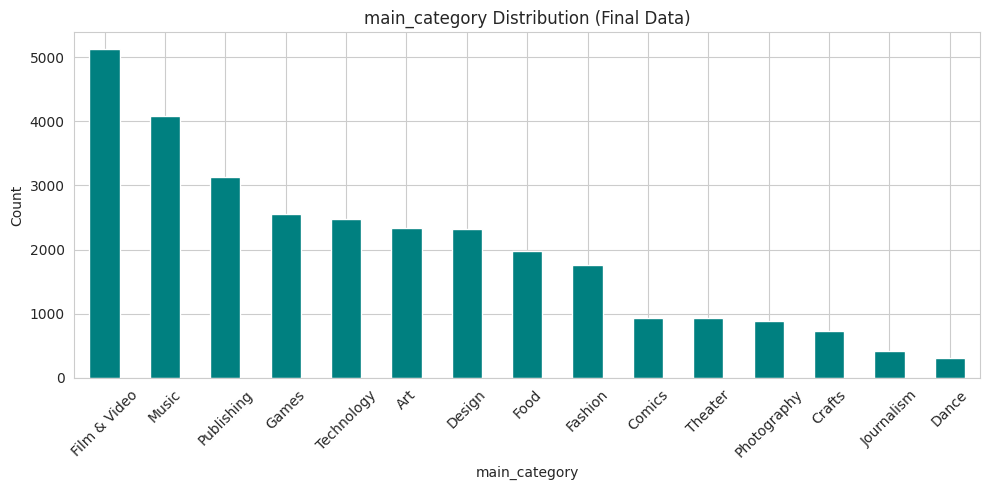

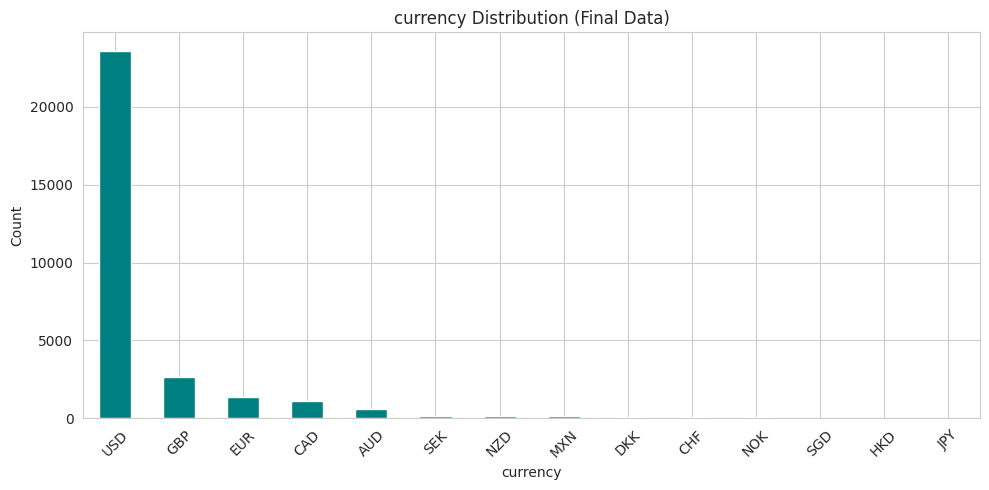

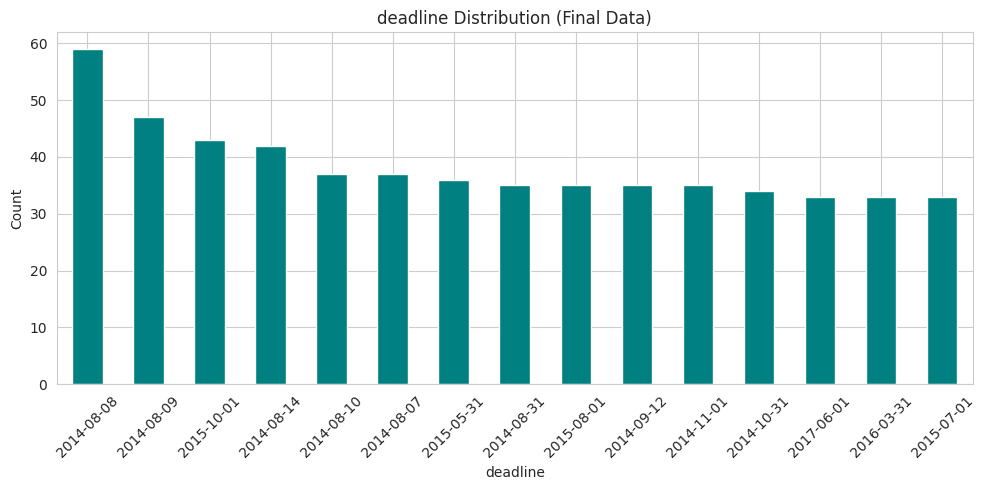

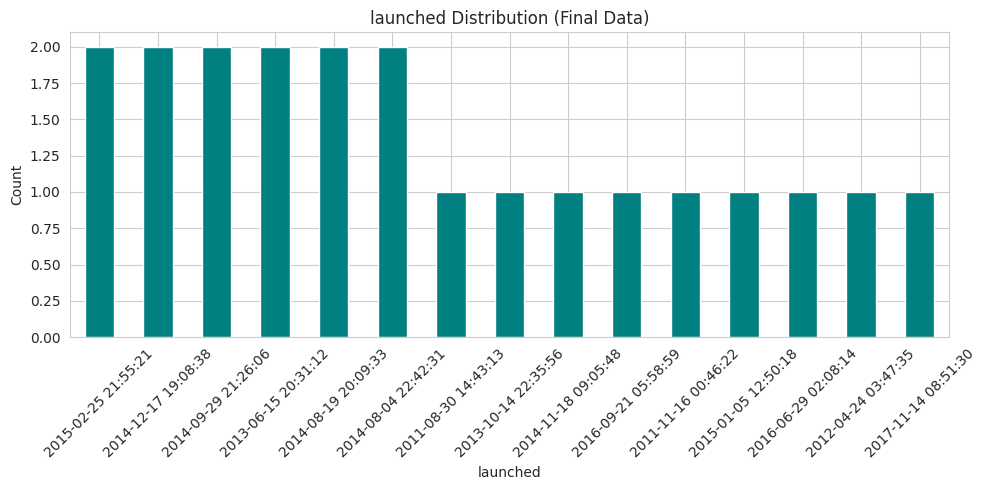

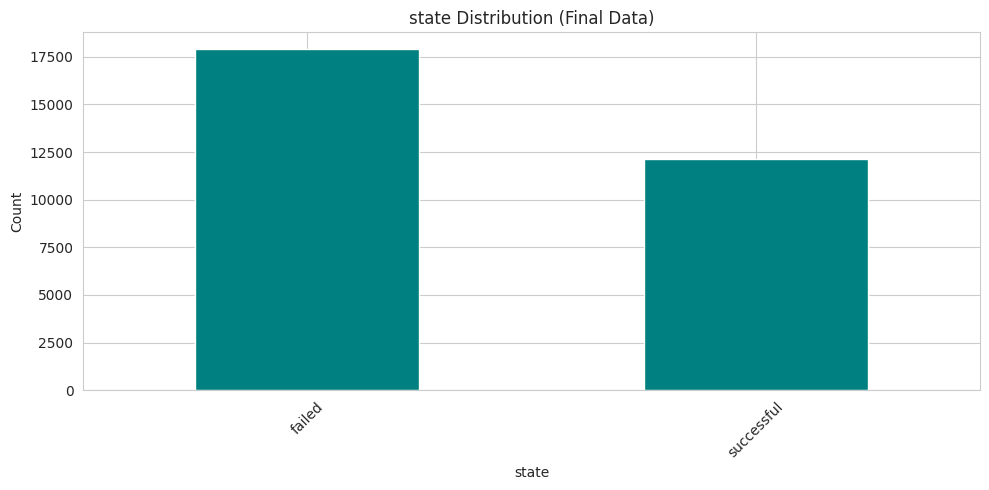

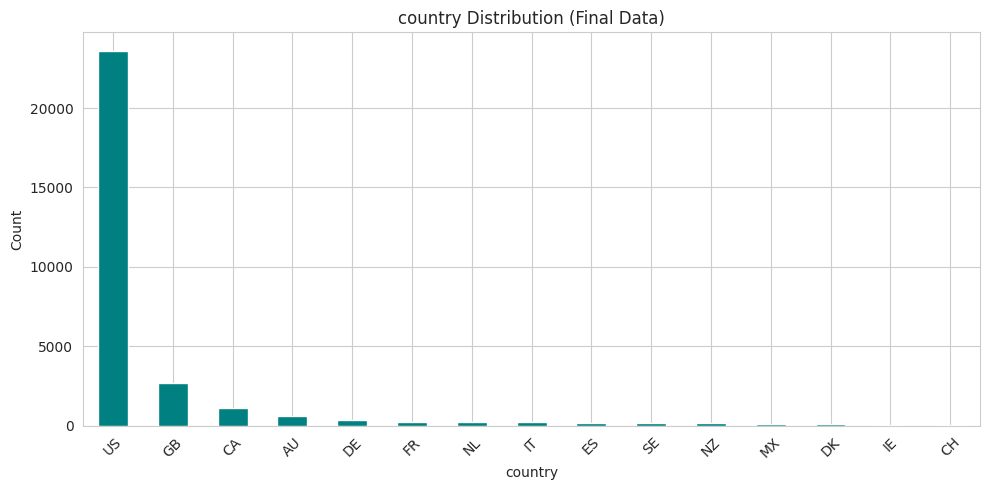

In [9]:
categorical_cols = df.select_dtypes(exclude=["int64", "float64"]).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind="bar", color="teal")
    plt.title(f"{col} Distribution (Final Data)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


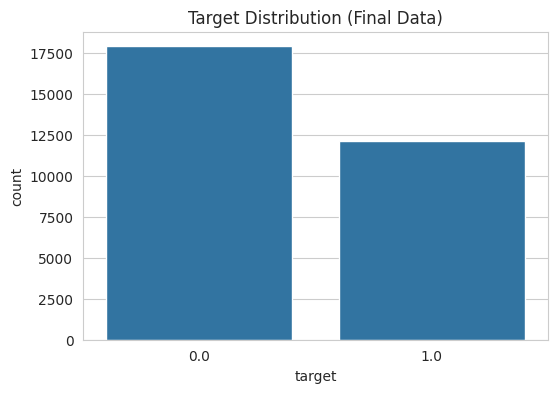

target
0.0    0.596133
1.0    0.403867
Name: proportion, dtype: float64

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["target"])
plt.title("Target Distribution (Final Data)")
plt.show()

df["target"].value_counts(normalize=True)


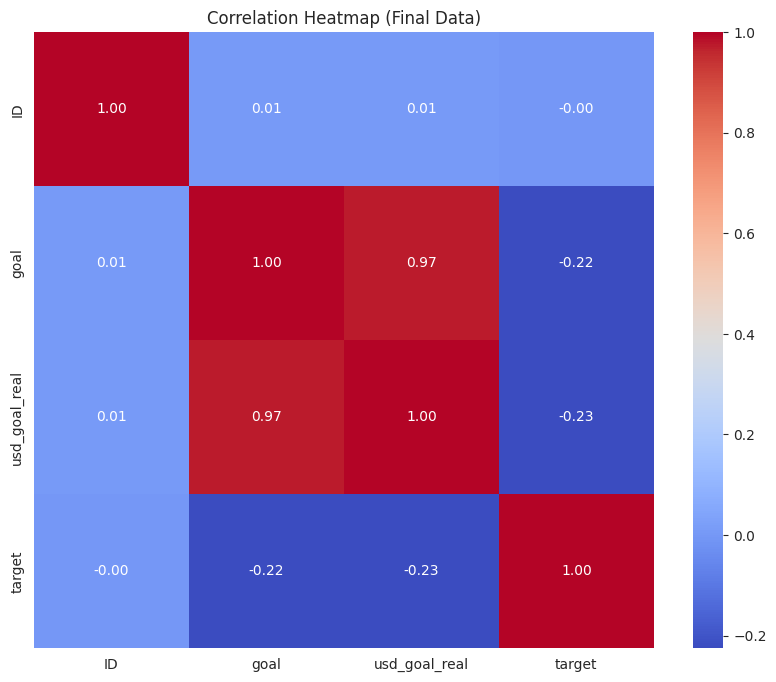

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Final Data)")
plt.show()
